In [3]:
pip install scikit-fuzzy

**To make this program interactive, I have programmed inputs to be taken by the user. You can have a look when you execute the program. The ranges to be entered are already specified to ease up the inputs without any errors. **

Building a Fuzzy Expert System for Service Center Management...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Evaluating the fuzzy expert system...
Enter mean delay (0 to 1): .5
Enter number of servers (0 to 1): .5
Enter utilisation factor (0 to 1): .5
Recommended number of spares: 0.37
Visualizing the fuzzy system...
Fuzzy Expert System completed executing.


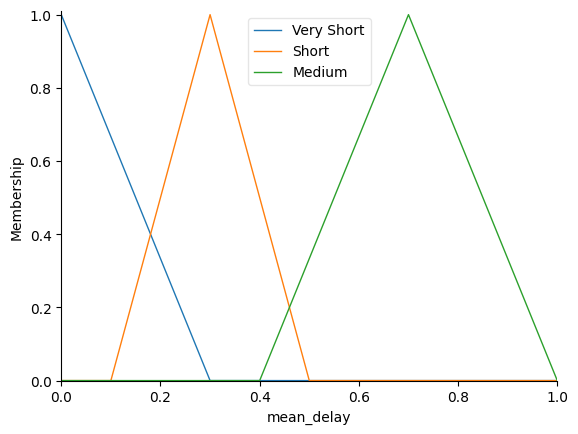

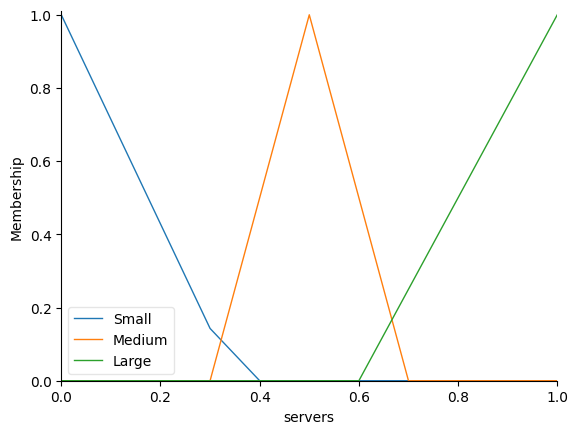

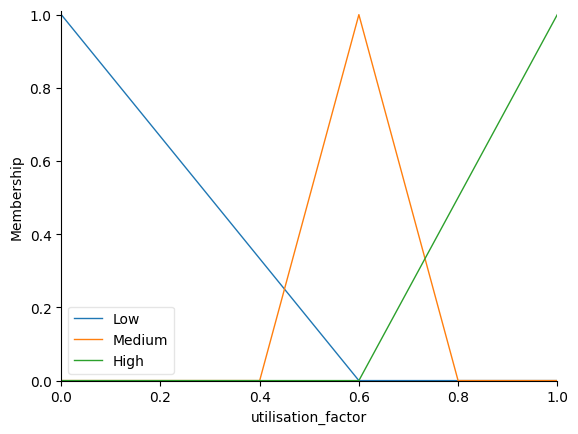

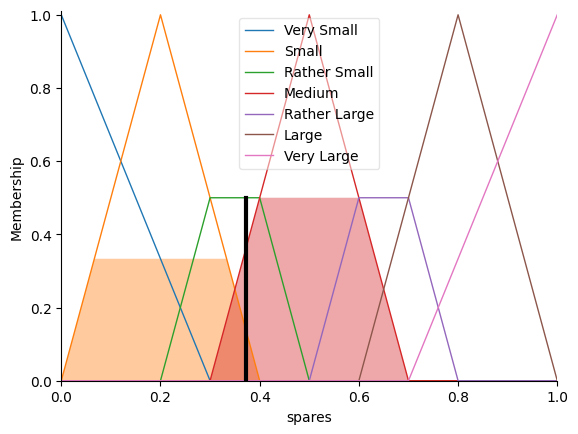

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Specify the problem and define linguistic variables
def define_variables():
    print("Defining linguistic variables and their fuzzy sets...")

    mean_delay = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'mean_delay')
    servers = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'servers')
    utilisation_factor = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'utilisation_factor')
    spares = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'spares')

    # Define fuzzy sets for each variable
    mean_delay['Very Short'] = fuzz.trimf(mean_delay.universe, [0, 0, 0.3])
    mean_delay['Short'] = fuzz.trimf(mean_delay.universe, [0.1, 0.3, 0.5])
    mean_delay['Medium'] = fuzz.trimf(mean_delay.universe, [0.4, 0.7, 1])

    servers['Small'] = fuzz.trimf(servers.universe, [0, 0, 0.35])
    servers['Medium'] = fuzz.trimf(servers.universe, [0.3, 0.5, 0.7])
    servers['Large'] = fuzz.trimf(servers.universe, [0.6, 1, 1])

    utilisation_factor['Low'] = fuzz.trimf(utilisation_factor.universe, [0, 0, 0.6])
    utilisation_factor['Medium'] = fuzz.trimf(utilisation_factor.universe, [0.4, 0.6, 0.8])
    utilisation_factor['High'] = fuzz.trimf(utilisation_factor.universe, [0.6, 1, 1])

    spares['Very Small'] = fuzz.trimf(spares.universe, [0, 0, 0.3])
    spares['Small'] = fuzz.trimf(spares.universe, [0, 0.2, 0.4])
    spares['Rather Small'] = fuzz.trimf(spares.universe, [0.25, 0.35, 0.45])
    spares['Medium'] = fuzz.trimf(spares.universe, [0.3, 0.5, 0.7])
    spares['Rather Large'] = fuzz.trimf(spares.universe, [0.55, 0.65, 0.75])
    spares['Large'] = fuzz.trimf(spares.universe, [0.6, 0.8, 1])
    spares['Very Large'] = fuzz.trimf(spares.universe, [0.7, 1, 1])

    print("Linguistic variables and fuzzy sets defined successfully.")
    return mean_delay, servers, utilisation_factor, spares

# Step 2 & 3: Construct fuzzy rules
def construct_rules(mean_delay, servers, utilisation_factor, spares):
    print("Constructing fuzzy rules...")

    rule1 = ctrl.Rule(utilisation_factor['Low'], spares['Small'])
    rule2 = ctrl.Rule(utilisation_factor['Medium'], spares['Medium'])
    rule3 = ctrl.Rule(utilisation_factor['High'], spares['Large'])

    rule4 = ctrl.Rule(mean_delay['Very Short'] & servers['Small'], spares['Very Large'])
    rule5 = ctrl.Rule(mean_delay['Short'] & servers['Small'], spares['Large'])
    rule6 = ctrl.Rule(mean_delay['Medium'] & servers['Small'], spares['Medium'])

    rule7 = ctrl.Rule(mean_delay['Very Short'] & servers['Medium'], spares['Rather Large'])
    rule8 = ctrl.Rule(mean_delay['Short'] & servers['Medium'], spares['Rather Small'])
    rule9 = ctrl.Rule(mean_delay['Medium'] & servers['Medium'], spares['Small'])

    print("Fuzzy rules constructed successfully.")
    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]

# Step 4: Encode fuzzy sets and rules into the expert system
def create_fuzzy_system(rules):
    print("Creating the fuzzy expert system...")
    spares_ctrl = ctrl.ControlSystem(rules)
    spares_sim = ctrl.ControlSystemSimulation(spares_ctrl)
    print("Fuzzy expert system created successfully.")
    return spares_sim

# Step 5: Evaluate the fuzzy expert system
def evaluate_system(spares_sim):
    print("Evaluating the fuzzy expert system...")

    mean_delay_input = float(input("Enter mean delay (0 to 1): "))
    servers_input = float(input("Enter number of servers (0 to 1): "))
    utilisation_factor_input = float(input("Enter utilisation factor (0 to 1): "))

    spares_sim.input['mean_delay'] = mean_delay_input
    spares_sim.input['servers'] = servers_input
    spares_sim.input['utilisation_factor'] = utilisation_factor_input

    spares_sim.compute()
    print(f"Recommended number of spares: {spares_sim.output['spares']:.2f}")

    return spares_sim

def visualize_system(mean_delay, servers, utilisation_factor, spares, spares_sim):
    print("Visualizing the fuzzy system...")

    mean_delay.view()
    servers.view()
    utilisation_factor.view()

    spares.view(sim=spares_sim)

if __name__ == "__main__":
    print("Building a Fuzzy Expert System for Service Center Management...")

    mean_delay, servers, utilisation_factor, spares = define_variables()

    rules = construct_rules(mean_delay, servers, utilisation_factor, spares)

    spares_sim = create_fuzzy_system(rules)
    spares_sim = evaluate_system(spares_sim)

    visualize_system(mean_delay, servers, utilisation_factor, spares, spares_sim)

    print("Fuzzy Expert System completed executing.")